In [1]:
from model_lomba import *
import matplotlib.pyplot as plt

map_width = 50
map_height = 50
moore = False
model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=0,cp_size= 20,width=map_width,height=map_height,moore=moore)

#Dalam menit
num_of_step = 14*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

In [2]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position  Charge Alive  Full_battery  Empty_battery  CP_full  \
Step AgentID                                                                
0    0           None  2600.0  None             0              0        0   
     1           None  2600.0  None             0              0        0   
     2           None  2600.0  None             0              0        0   
     3           None  2600.0  None             0              0        0   
     4           None  2600.0  None             0              0        0   

              CP_empty  
Step AgentID            
0    0               0  
     1               0  
     2               0  
     3               0  
     4               0

In [3]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
250    False
251    False
252    False
253     True
254     True
255     True
256    False
257     True
258     True
259    False
260     True
261     True
262     True
263    False
264     True
265     True
266     True
267     True
268    False
269    False
270     True
271    False
272    False
273     True
274    False
275    False
276     True
277     True
278    False
279     True
280     True
281     True
282     True
283    False
284     True
285     True
286     True
287     True
288     True
289    False
290     True
291     True
292     True
293     True
294     True
295    False
296     True
297    False
298     True
299     True
Name: Alive, dtype: object

In [4]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
300    (49, 37)
301     (48, 3)
302      (0, 4)
303    (33, 29)
304    (45, 17)
305     (26, 5)
306     (8, 29)
307    (14, 23)
308     (14, 0)
309    (36, 38)
Name: Position, dtype: object


In [5]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
300    0
301    0
302    0
303    0
304    0
305    0
306    0
307    0
308    0
309    0
Name: Full_battery, dtype: int64


In [6]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
300    0
301    0
302    0
303    0
304    0
305    0
306    0
307    0
308    0
309    0
Name: Empty_battery, dtype: int64


In [7]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
300    17
301    19
302    20
303    17
304    18
305    18
306     8
307    20
308    19
309    16
Name: CP_full, dtype: int64


In [8]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
300     3
301     1
302     0
303     3
304     2
305     2
306    12
307     0
308     1
309     4
Name: CP_empty, dtype: int64


In [9]:
#Ambil data motorist
driver_num = 0
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (36, 39)
20156    (36, 39)
20157    (36, 39)
20158    (36, 39)
20159    (36, 39)
Name: Position, dtype: object

Text(0, 0.5, 'y')

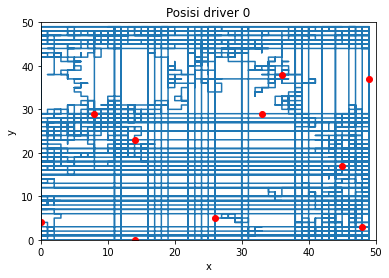

In [10]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.xlabel('x')
plt.ylabel('y')

<AxesSubplot:xlabel='Step'>

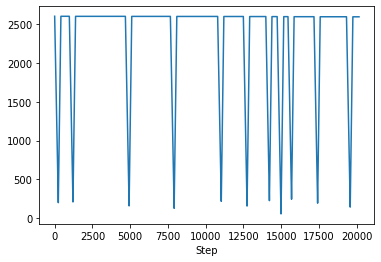

In [11]:
#Cek baterai
battery_id = 18
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()



In [12]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive
20155,33
20156,33
20157,33
20158,33
20159,33


Text(0.5, 0, 'Steps')

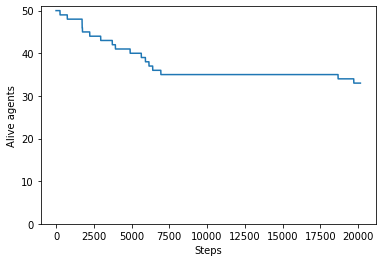

In [15]:
plt.plot(model_data)
plt.ylim([0,51])
plt.ylabel("Alive agents")
plt.xlabel("Steps")

In [14]:
a = [1,2,3]
b = a
b.remove(3)
print(a)

[1, 2]
